In [186]:
#importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [187]:
big_mart_data = pd.read_csv('/content/Train.csv')
big_mart_data_test = pd.read_csv('/content/Test.csv')


In [188]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [189]:
big_mart_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


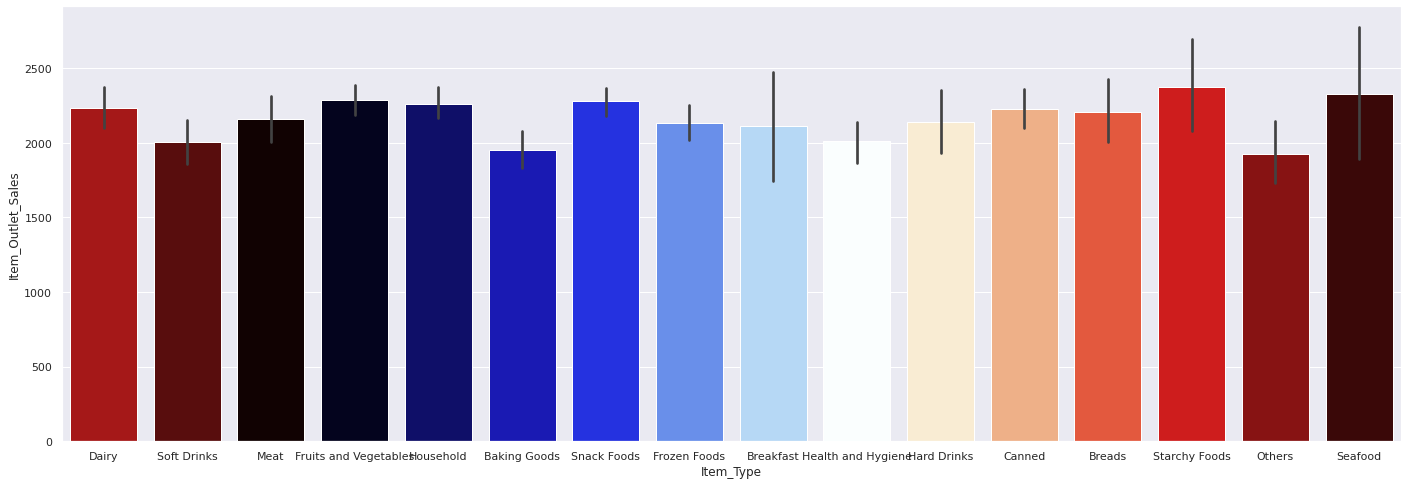

In [190]:
# plt.figure(figsize=(24,8))
# sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=big_mart_data,palette= 'flag')

In [191]:
big_mart_data.shape

(8523, 12)

In [192]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [193]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [194]:
big_mart_data.isna().sum()/big_mart_data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

17.1% of the data in item_Weight is missing 

28.3% of the data in the outlet size is missing 

In [195]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

categorical Features:



*  Items identifier 
*  item fat content 


*   item type 
*   outlet identifier


*   outlet size
*   outlet type













In [196]:
#replacing our null data

replacing the missing value in Item_Weight

In [197]:
sns.set()

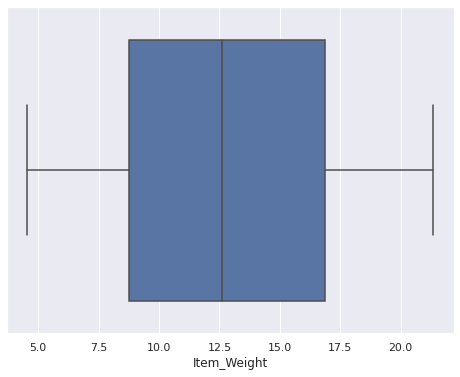

In [198]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Item_Weight', data=big_mart_data)

this claerly shows that there are no outliers in this column, so its easier to proceed with thye big_mart_data training dataset 

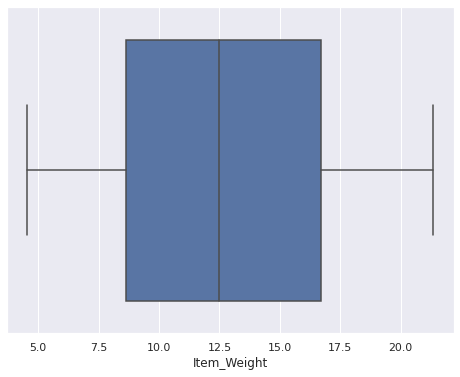

In [199]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Item_Weight', data=big_mart_data_test)

this clearly shows that there are no outliers in this column, so its easier to proceed with the big_mart_data_test testing dataset 

In [200]:
big_mart_data.Item_Weight.fillna(big_mart_data.Item_Weight.mean(),inplace=True)
big_mart_data_test.Item_Weight.fillna(big_mart_data_test.Item_Weight.mean(),inplace=True)



In [201]:
big_mart_data.isnull().sum()
#Item weight has been filled 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [202]:
big_mart_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

replacing the missing values in Outlet size

In [203]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size_test = big_mart_data_test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))



In [204]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [205]:
missing_values = big_mart_data['Outlet_Size'].isnull()
missing_values_test = big_mart_data_test['Outlet_Size'].isnull()



In [206]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [207]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
big_mart_data_test.loc[missing_values, 'Outlet_Size'] = big_mart_data_test.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])


In [208]:
big_mart_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

EDA

In [209]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


numerical features 

In [210]:
sns.set()


<Figure size 504x504 with 0 Axes>

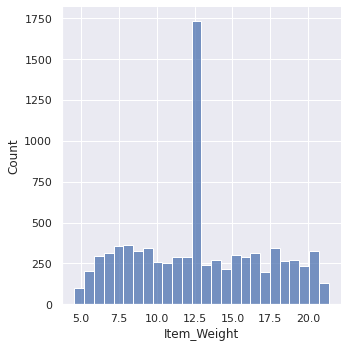

In [211]:
#item_weight distribution

plt.figure(figsize=(7,7))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 504x504 with 0 Axes>

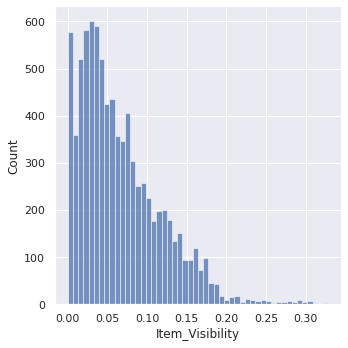

In [212]:
#item visibility distribution
plt.figure(figsize=(7,7))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 504x504 with 0 Axes>

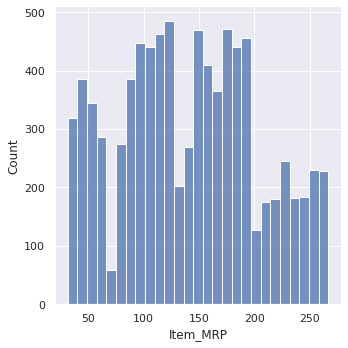

In [213]:
#item MRP distribution 
plt.figure(figsize=(7,7))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


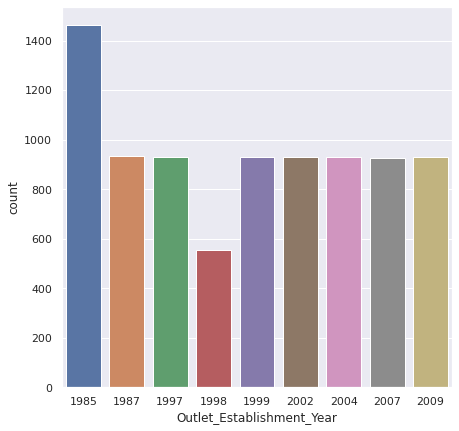

In [214]:
#Outlet_Establishment_Year distribution 
plt.figure(figsize=(7,7))
sns.countplot(big_mart_data['Outlet_Establishment_Year'])
plt.show()

In [215]:
#we just saw the distribution of the non categorical columns

Categorical Features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


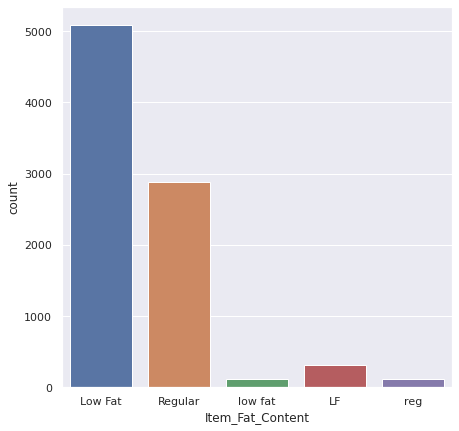

In [216]:
#fat_distribution
plt.figure(figsize=(7,7))
sns.countplot(big_mart_data['Item_Fat_Content'])
plt.show()

In [217]:
#WE HAVE TO COMBINE THE LOW FAT(blue) WITH THE LF(wine) AND LOW FAT(purple)
#also have to combine the two regulars 

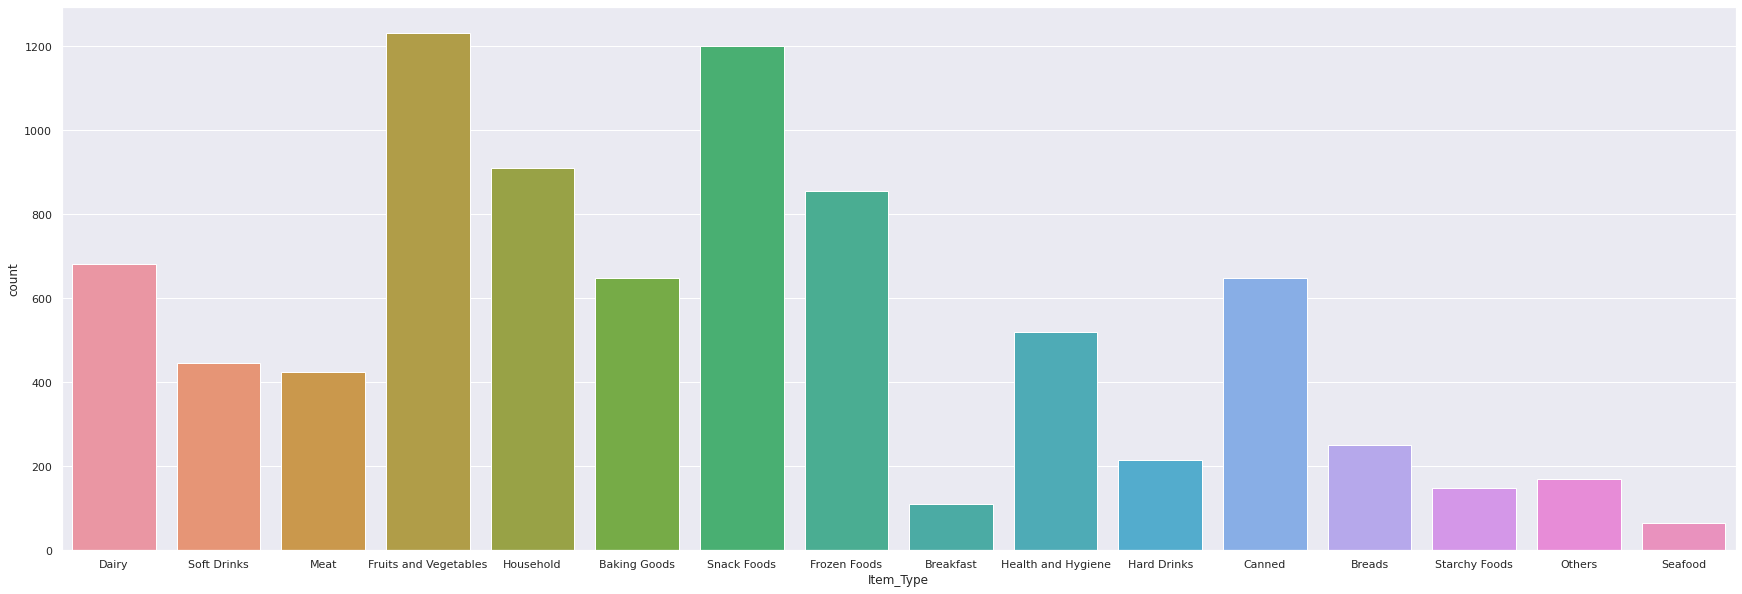

In [218]:
#itm_type_column
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type',data= big_mart_data) #['Item_Type'])
plt.show()

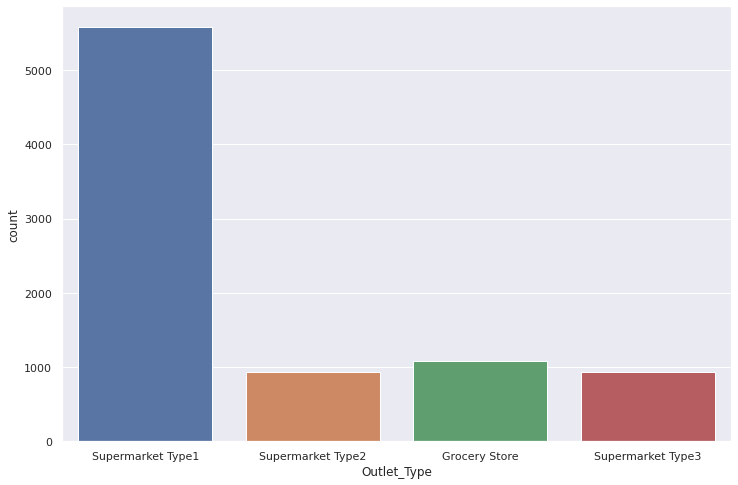

In [219]:
#Outlet_type_column
plt.figure(figsize=(12,8))
sns.countplot(x='Outlet_Type',data= big_mart_data) #['Item_Type'])
plt.show()

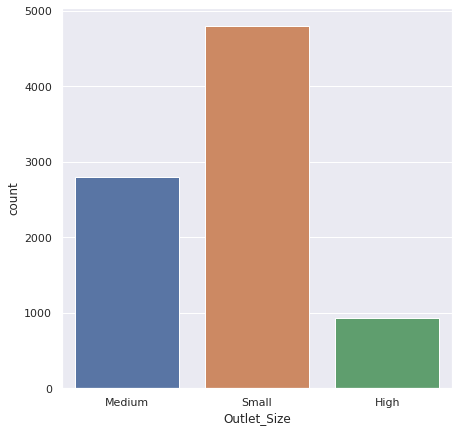

In [220]:
#Outlet_siz_column
plt.figure(figsize=(7,7))
sns.countplot(x='Outlet_Size',data= big_mart_data) #['Item_Type'])
plt.show()

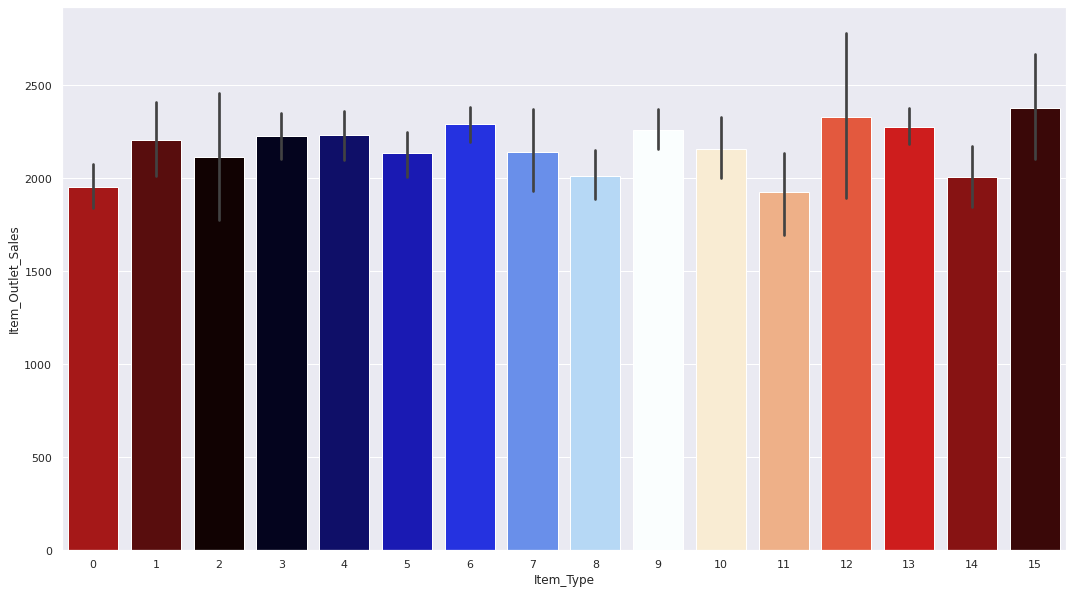

In [242]:
plt.figure(figsize=(18,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=big_mart_data,palette= 'flag')


Data Preprocesing 

In [222]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [223]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [224]:
#we want to combine the fat types here 
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

#THIS SYNTAX CAN ALSO BE USED TO REPLACE STUFF INSTEAD OFTHE DICT ONE UP HERE 

# big_mart_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)
# big_mart_data_test['Item_Fat_Content'].replace(['low fat','LF','reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

now to our label encoding 

In [225]:
encoder = LabelEncoder()

In [226]:
big_mart_data['Item_Identifier']= encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data_test['Item_Identifier']= encoder.fit_transform(big_mart_data_test['Item_Identifier'])


In [227]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [228]:
big_mart_data['Item_Fat_Content']= encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']= encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']= encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size']= encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type']= encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']= encoder.fit_transform(big_mart_data['Outlet_Type'])


big_mart_data_test['Item_Fat_Content']= encoder.fit_transform(big_mart_data_test['Item_Fat_Content'])

big_mart_data_test['Item_Type']= encoder.fit_transform(big_mart_data_test['Item_Type'])

big_mart_data_test['Outlet_Identifier']= encoder.fit_transform(big_mart_data_test['Outlet_Identifier'])

big_mart_data_test['Outlet_Size']= encoder.fit_transform(big_mart_data_test['Outlet_Size'])

big_mart_data_test['Outlet_Location_Type']= encoder.fit_transform(big_mart_data_test['Outlet_Location_Type'])

big_mart_data_test['Outlet_Type']= encoder.fit_transform(big_mart_data_test['Outlet_Type'])



In [229]:
big_mart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [230]:
big_mart_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


TO PREDICTION


In [231]:
X_train=big_mart_data.drop('Item_Outlet_Sales',axis=1)
Y_train=big_mart_data['Item_Outlet_Sales']
X_test = big_mart_data_test

In [232]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [233]:
Y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [234]:
print(X_train.shape,X_test.shape,Y_train.shape)

(8523, 11) (5681, 11) (8523,)


In [235]:
regressor = XGBRegressor()

In [236]:
regressor.fit(X_train,Y_train)

[02:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [237]:
training_data_prediction = regressor.predict(X_train)

In [238]:
training_r2_score = metrics.r2_score(Y_train,training_data_prediction)

In [239]:
print(training_r2_score)

0.6287696729569408


In [240]:
test_data_prediction= regressor.predict(X_test)

In [241]:
#WE DONT HAVE THE RESULTS,SO NOTHING TO COMPARE IT TOO 